Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.width", 120)

from google.colab import files


In [ ]:
uploaded = files.upload()
df = pd.read_csv("Zomato-data-.csv")
df.head()

Saving Zomato-data-.csv to Zomato-data- (3).csv


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
#duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

df[df.duplicated()].head()


Duplicate rows: 0


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)


In [ ]:
#Votes Column
col = df["votes"]

print("Column: votes")
print("Data type:", col.dtype)
print("Count:", col.count())
print("Min:", col.min())
print("Max:", col.max())
print("Range:", col.max() - col.min())
print("Mean:", col.mean())
print("Median:", col.median())
print("Mode:", col.mode().iloc[0])


Column: votes
Data type: int64
Count: 148
Min: 0
Max: 4884
Range: 4884
Mean: 264.81081081081084
Median: 43.5
Mode: 0


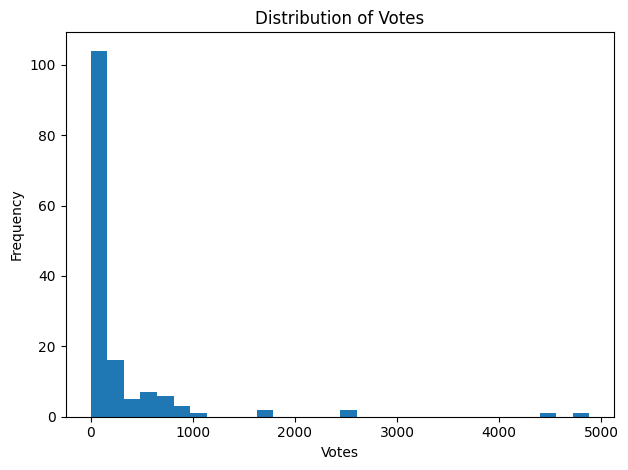

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(col, bins=30)
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


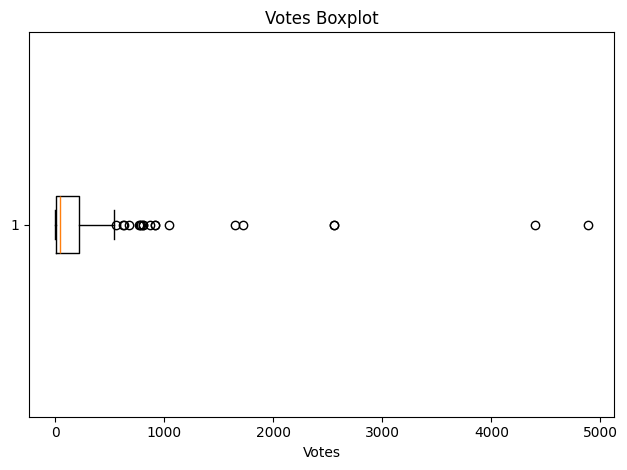

In [ ]:
plt.figure()
plt.boxplot(col, vert=False)
plt.title("Votes Boxplot")
plt.xlabel("Votes")
plt.tight_layout()
plt.show()


In [ ]:
bins = [0, 10, 50, 100, 200, 500, 1000, col.max()]
labels = ["0–10", "11–50", "51–100", "101–200", "201–500", "501–1000", "1000+"]

vote_bins = pd.cut(col, bins=bins, labels=labels, include_lowest=True)

print("\nVotes Distribution (Binned):")
print(vote_bins.value_counts().sort_index())



Votes Distribution (Binned):
votes
0–10        46
11–50       30
51–100      19
101–200     14
201–500     16
501–1000    16
1000+        7
Name: count, dtype: int64


In [ ]:
#Unique Values
MAX_UNIQUE = 30

for col in df.columns:
    uniq_count = df[col].nunique(dropna=False)
    print("\n" + "="*80)
    print(f"Column: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Unique count (incl NaN): {uniq_count}")

    if uniq_count <= MAX_UNIQUE:
        print("Unique values:")
        print(df[col].unique())
    else:
        print("Too many unique values to display")



Column: name
Data type: object
Unique count (incl NaN): 145
Too many unique values to display

Column: online_order
Data type: object
Unique count (incl NaN): 2
Unique values:
['Yes' 'No']

Column: book_table
Data type: object
Unique count (incl NaN): 2
Unique values:
['Yes' 'No']

Column: rate
Data type: object
Unique count (incl NaN): 20
Unique values:
['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' '2.9/5' '3.5/5' '2.6/5'
 '3.8 /5' '3.4/5']

Column: votes
Data type: int64
Unique count (incl NaN): 90
Too many unique values to display

Column: approx_cost(for two people)
Data type: int64
Unique count (incl NaN): 18
Unique values:
[800 300 600 700 550 500 450 650 400 900 200 750 150 850 100 350 250 950]

Column: listed_in(type)
Data type: object
Unique count (incl NaN): 4
Unique values:
['Buffet' 'Cafes' 'other' 'Dining']


Data Transformation

In [ ]:
# Droping name column
df = df.drop(columns=["name"])

In [ ]:
# Convert Online order and book table column values from Yes/No to 1/0
df["online_order"] = df["online_order"].map({"Yes": 1, "No": 0})
df["book_table"] = df["book_table"].map({"Yes": 1, "No": 0})

In [ ]:
# Convert Rate to numeric
df["rate_num"] = (
    df["rate"]
    .astype(str)
    .str.replace("/5", "", regex=False)
    .str.strip()
)

df["rate_num"] = pd.to_numeric(df["rate_num"], errors="coerce")


In [ ]:
#Since Votes column highly skewed applying log transformation
df["votes_log"] = np.log1p(df["votes"])

In [ ]:
df = df.drop(columns=["votes"])

In [ ]:
#One hot Encode listed column
df = pd.get_dummies(df, columns=["listed_in(type)"], drop_first=True)

In [ ]:
#Unique Values
MAX_UNIQUE = 30

for col in df.columns:
    uniq_count = df[col].nunique(dropna=False)
    print("\n" + "="*80)
    print(f"Column: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Unique count (incl NaN): {uniq_count}")

    if uniq_count <= MAX_UNIQUE:
        print("Unique values:")
        print(df[col].unique())
    else:
        print("Too many unique values to display")


Column: online_order
Data type: int64
Unique count (incl NaN): 2
Unique values:
[1 0]

Column: book_table
Data type: int64
Unique count (incl NaN): 2
Unique values:
[1 0]

Column: rate
Data type: object
Unique count (incl NaN): 20
Unique values:
['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' '2.9/5' '3.5/5' '2.6/5'
 '3.8 /5' '3.4/5']

Column: approx_cost(for two people)
Data type: int64
Unique count (incl NaN): 18
Unique values:
[800 300 600 700 550 500 450 650 400 900 200 750 150 850 100 350 250 950]

Column: rate_num
Data type: float64
Unique count (incl NaN): 19
Unique values:
[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 2.9 3.5 2.6
 3.4]

Column: votes_log
Data type: float64
Unique count (incl NaN): 90
Too many unique values to display

Column: listed_in(type)_Cafes
Data type: bool
Unique count (incl NaN): 2
Unique values:
[False  True]

Column: listed_in(type)_Dining
Data type: bool
Unique 

In [ ]:
df.head()

,online_order,book_table,rate,approx_cost(for two people),rate_num,votes_log,listed_in(type)_Cafes,listed_in(type)_Dining,listed_in(type)_other
0,1,1,4.1/5,800,4.1,6.654153,False,False,False
1,1,0,4.1/5,800,4.1,6.669498,False,False,False
2,1,0,3.8/5,800,3.8,6.823286,False,False,False
3,0,0,3.7/5,300,3.7,4.488636,False,False,False
4,0,0,3.8/5,600,3.8,5.117994,False,False,False


In [ ]:
#Drop rate column
df = df.drop(columns=["rate"])

In [ ]:
one_hot_cols = [
    "listed_in(type)_Cafes",
    "listed_in(type)_Dining",
    "listed_in(type)_other"
]

df[one_hot_cols] = df[one_hot_cols].astype(int)


In [ ]:
#Unique Values
MAX_UNIQUE = 30

for col in df.columns:
    uniq_count = df[col].nunique(dropna=False)
    print("\n" + "="*80)
    print(f"Column: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Unique count (incl NaN): {uniq_count}")

    if uniq_count <= MAX_UNIQUE:
        print("Unique values:")
        print(df[col].unique())
    else:
        print("Too many unique values to display")


Column: online_order
Data type: int64
Unique count (incl NaN): 2
Unique values:
[1 0]

Column: book_table
Data type: int64
Unique count (incl NaN): 2
Unique values:
[1 0]

Column: approx_cost(for two people)
Data type: int64
Unique count (incl NaN): 18
Unique values:
[800 300 600 700 550 500 450 650 400 900 200 750 150 850 100 350 250 950]

Column: rate_num
Data type: float64
Unique count (incl NaN): 19
Unique values:
[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 2.9 3.5 2.6
 3.4]

Column: votes_log
Data type: float64
Unique count (incl NaN): 90
Too many unique values to display

Column: listed_in(type)_Cafes
Data type: int64
Unique count (incl NaN): 2
Unique values:
[0 1]

Column: listed_in(type)_Dining
Data type: int64
Unique count (incl NaN): 2
Unique values:
[0 1]

Column: listed_in(type)_other
Data type: int64
Unique count (incl NaN): 2
Unique values:
[0 1]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 148 non-null    int64  
 1   book_table                   148 non-null    int64  
 2   approx_cost(for two people)  148 non-null    int64  
 3   rate_num                     148 non-null    float64
 4   votes_log                    148 non-null    float64
 5   listed_in(type)_Cafes        148 non-null    int64  
 6   listed_in(type)_Dining       148 non-null    int64  
 7   listed_in(type)_other        148 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 9.4 KB


In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# scalers = {
#     "Standard": StandardScaler(),
#     "MinMax": MinMaxScaler(),
#     "Robust": RobustScaler()
# }

# for name, scaler in scalers.items():
#     X_scaled2 = scaler.fit_transform(df)
#     print(f"\n{name} scaler — feature ranges:")
#     print(pd.DataFrame(X_scaled2, columns=df.columns).describe().loc[["mean","std","min","max"]])


In [ ]:
# Using Robust Scaler on the dataset instead of standard Scaler as there are outliers and standard scaler will be pulled by extreme values
# formula >> X_scaled = (x- median)/IQR

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df)

X = pd.DataFrame(X_scaled, columns=df.columns)
X.head()


,online_order,book_table,approx_cost(for two people),rate_num,votes_log,listed_in(type)_Cafes,listed_in(type)_Dining,listed_in(type)_other
0,1.0,1.0,1.00,0.666667,0.851021,0.0,-1.0,0.0
1,1.0,0.0,1.00,0.666667,0.855588,0.0,-1.0,0.0
2,1.0,0.0,1.00,0.166667,0.901362,0.0,-1.0,0.0
3,0.0,0.0,-0.25,0.000000,0.206477,0.0,-1.0,0.0
4,0.0,0.0,0.50,0.166667,0.393799,0.0,-1.0,0.0


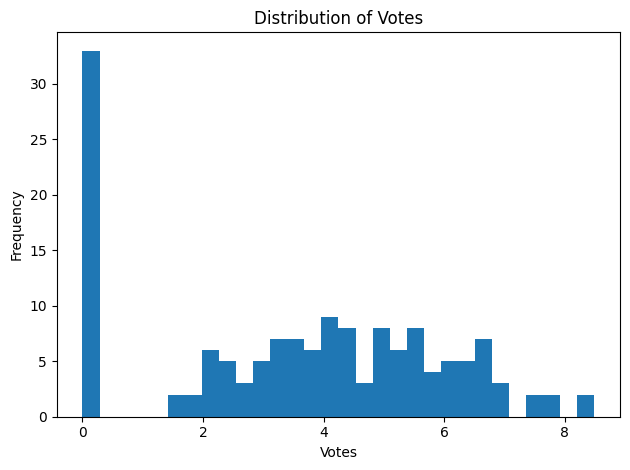

In [ ]:
#plotting votes histogram again
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['votes_log'], bins=30)
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

K means Clustering

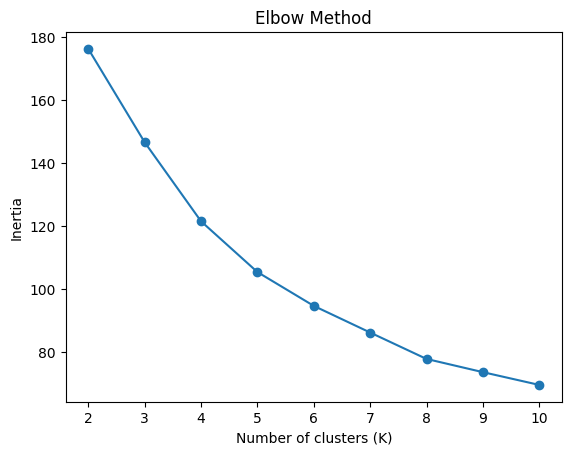

In [ ]:
#Elbow Method to determine clusters
from sklearn.cluster import KMeans

inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

#From the graph 4-5 clusters could be optimal


In [ ]:
#Silhouettue Score
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"K={k} → Silhouette Score: {score:.3f}")


K=2 → Silhouette Score: 0.340
K=3 → Silhouette Score: 0.256
K=4 → Silhouette Score: 0.292
K=5 → Silhouette Score: 0.308
K=6 → Silhouette Score: 0.303
K=7 → Silhouette Score: 0.304
K=8 → Silhouette Score: 0.331
K=9 → Silhouette Score: 0.323
K=10 → Silhouette Score: 0.317


In [ ]:
# #PCA before
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.9)
# X_pca = pca.fit_transform(X)

#Feature Weighting

# X_weighted = X.copy()

# binary_cols = [
#     "online_order",
#     "book_table",
#     "listed_in(type)_Cafes",
#     "listed_in(type)_Dining",
#     "listed_in(type)_other"
# ]

# X_weighted[binary_cols] = X_weighted[binary_cols] * 0.5



In [ ]:
cols_high_signal = [
    "approx_cost(for two people)",
    "rate_num",
    "votes_log"
]

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_high = StandardScaler().fit_transform(df[cols_high_signal])

for k in range(2, 7):
    labels = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=50
    ).fit_predict(X_high)

    print(f"K={k}, silhouette={silhouette_score(X_high, labels):.3f}")


K=2, silhouette=0.396
K=3, silhouette=0.335
K=4, silhouette=0.382
K=5, silhouette=0.363
K=6, silhouette=0.347


In [ ]:
k_final = 5

kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)

df.head()


,online_order,book_table,approx_cost(for two people),rate_num,votes_log,listed_in(type)_Cafes,listed_in(type)_Dining,listed_in(type)_other,cluster
0,1,1,800,4.1,6.654153,0,0,0,4
1,1,0,800,4.1,6.669498,0,0,0,4
2,1,0,800,3.8,6.823286,0,0,0,4
3,0,0,300,3.7,4.488636,0,0,0,3
4,0,0,600,3.8,5.117994,0,0,0,4


In [ ]:
df.to_csv("zomato_kmeans_clusters.csv", index=False)
files.download("zomato_kmeans_clusters.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["cluster"])
sil_score

# Silhouette Score	Interpretation
# > 0.70	Excellent, very well-separated clusters (rare in real data)
# 0.50 – 0.70	Good clustering
# 0.30 – 0.50	Acceptable / reasonable clustering
# 0.20 – 0.30	Weak but usable (real-world noisy data)
# < 0.20	Poor clustering


np.float64(0.30778058844352874)

In [ ]:
#Intra distance
from sklearn.metrics import pairwise_distances
import numpy as np

def intra_cluster_distance(X, labels):
    distances = []
    for c in np.unique(labels):
        cluster_points = X[labels == c]
        if len(cluster_points) > 1:
            d = pairwise_distances(cluster_points)
            distances.append(d.mean())
    return np.mean(distances)

intra_dist = intra_cluster_distance(X.values, df["cluster"].values)
intra_dist


np.float64(1.1524633202588512)

In [ ]:
#Inter distance
centroids = kmeans.cluster_centers_

inter_dist = pairwise_distances(centroids).mean()
inter_dist


np.float64(1.3672700576485823)

In [ ]:
#Ratio
inter_intra_ratio = inter_dist / intra_dist
inter_intra_ratio

# > 1.5	Good separation
# 1.2 – 1.5	Acceptable
# < 1.2	Weak clustering

np.float64(1.1863892183063007)

Self Organizing Maps

In [ ]:
import re
import numpy as np
import pandas as pd

import torch
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as SKKMeans
from sklearn.metrics import silhouette_score

PATH = "/content/Zomato-data-.csv"  # Colab path
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

df = pd.read_csv(PATH)

def parse_rate(x):
    if isinstance(x, str):
        m = re.search(r"([\d\.]+)", x)
        return float(m.group(1)) if m else np.nan
    try:
        return float(x)
    except:
        return np.nan

df["rate_num"] = df["rate"].apply(parse_rate)
df = df.rename(columns={"approx_cost(for two people)": "cost_for_two"})

df["online_order_bin"] = (df["online_order"].astype(str).str.lower().str.strip() == "yes").astype(int)
df["book_table_bin"]   = (df["book_table"].astype(str).str.lower().str.strip() == "yes").astype(int)

for col in ["rate_num", "votes", "cost_for_two"]:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

def winsorize_series(s, lower_q=0.01, upper_q=0.99):
    lo = s.quantile(lower_q)
    hi = s.quantile(upper_q)
    return s.clip(lo, hi)

def build_X(
    df,
    use_log_votes=True,
    use_log_cost=False,
    clip_votes=True,
    clip_cost=True,
    vote_clip=(0.01, 0.99),
    cost_clip=(0.01, 0.99),
    weights=(1.0, 1.0, 1.0, 1.0, 1.0),
    use_pca=False,
    pca_var=0.95
):
    """
    weights order: (rate, votes, cost, online_order, book_table)
    Returns: X (numpy), fitted scaler (and pca if used)
    """
    tmp = df.copy()

    # clip before log
    tmp["votes_clipped"] = winsorize_series(tmp["votes"].astype(float), *vote_clip) if clip_votes else tmp["votes"].astype(float)
    tmp["cost_clipped"]  = winsorize_series(tmp["cost_for_two"].astype(float), *cost_clip) if clip_cost else tmp["cost_for_two"].astype(float)

    # transforms
    tmp["votes_feat"] = np.log1p(tmp["votes_clipped"]) if use_log_votes else tmp["votes_clipped"]
    tmp["cost_feat"]  = np.log1p(tmp["cost_clipped"])  if use_log_cost  else tmp["cost_clipped"]

    feats = tmp[["rate_num", "votes_feat", "cost_feat", "online_order_bin", "book_table_bin"]].copy()

    # weights
    w_rate, w_votes, w_cost, w_oo, w_bt = weights
    feats["rate_num"]         *= w_rate
    feats["votes_feat"]       *= w_votes
    feats["cost_feat"]        *= w_cost
    feats["online_order_bin"] *= w_oo
    feats["book_table_bin"]   *= w_bt

    scaler = RobustScaler()
    X = scaler.fit_transform(feats.values)

    pca = None
    if use_pca:
        pca = PCA(n_components=pca_var, random_state=RANDOM_SEED)
        X = pca.fit_transform(X)

    return X, scaler, pca

# SOM
class SOM(torch.nn.Module):
    def __init__(self, m, n, dim, device):
        super().__init__()
        self.m, self.n, self.dim = m, n, dim
        self.num = m * n

        # neuron weights
        self.weights = torch.nn.Parameter(torch.randn(self.num, dim, device=device))

        coords = []
        for i in range(m):
            for j in range(n):
                coords.append([i, j])
        self.register_buffer("locs", torch.tensor(coords, dtype=torch.float32, device=device))

    @torch.no_grad()
    def bmu(self, x):
        d = torch.cdist(x, self.weights)
        return torch.argmin(d, dim=1)

def train_som_batch(Xt, m=8, n=8, epochs=400, lr=0.6, sigma=None, batch_size=32, seed=42):
    torch.manual_seed(seed)
    som = SOM(m, n, Xt.shape[1], Xt.device).to(Xt.device)
    N = Xt.shape[0]

    if sigma is None:
        sigma = max(m, n) / 2.0

    sigma0, lr0 = sigma, lr

    for ep in range(epochs):
        t = ep / max(1, (epochs - 1))
        lr_t = lr0 * (1 - t) + 0.03 * t
        sigma_t = sigma0 * (1 - t) + 0.8 * t

        perm = torch.randperm(N, device=Xt.device)
        for start in range(0, N, batch_size):
            idx = perm[start:start + batch_size]
            xb = Xt[idx]

            bmu_idx = som.bmu(xb)
            bmu_loc = som.locs[bmu_idx]

            # neighborhood influence h: (B, num_neurons)
            dist2 = torch.cdist(bmu_loc, som.locs) ** 2
            h = torch.exp(-dist2 / (2 * (sigma_t ** 2)))

            # compute weighted targets for each neuron
            h_sum = h.sum(dim=0).unsqueeze(1) + 1e-12
            x_weighted = (h.unsqueeze(2) * xb.unsqueeze(1)).sum(dim=0)
            target = x_weighted / h_sum

            som.weights.data += lr_t * (target - som.weights.data)

    return som

# Convert SOM to K cluster labels
def som_labels_from_codebook(X, som, K, random_state=42):
    """
    1) map each sample -> BMU neuron index
    2) cluster SOM neurons (codebook) into K clusters
    3) sample cluster = cluster(neuron)
    """
    Xt = torch.tensor(X, dtype=torch.float32, device=device)
    bmu_idx = som.bmu(Xt).detach().cpu().numpy()

    codebook = som.weights.detach().cpu().numpy()
    km = SKKMeans(n_clusters=K, random_state=random_state, n_init=50)
    neuron_clusters = km.fit_predict(codebook)

    return neuron_clusters[bmu_idx]

# check silhouette for K
X, scaler, pca = build_X(
    df,
    use_log_votes=True,
    use_log_cost=False,
    clip_votes=True,
    clip_cost=True,
    weights=(1.0, 1.2, 1.0, 0.6, 0.6),  # downweight binary a bit
    use_pca=False
)

Xt = torch.tensor(X, dtype=torch.float32, device=device)

# Train SOM
som = train_som_batch(
    Xt,
    m=8, n=8,
    epochs=450,
    lr=0.55,
    sigma=None,
    batch_size=32,
    seed=RANDOM_SEED
)

# Evaluate silhouette across K
best = {"K": None, "sil": -1, "labels": None}

print("\n=== SOM Silhouette by K ===")
for K in range(2, 11):
    labels = som_labels_from_codebook(X, som, K, random_state=RANDOM_SEED)
    sizes = np.bincount(labels)
    # avoid tiny clusters (silhouette can lie)
    if sizes.min() < 0.05 * len(labels):
        print(f"K={K} skipped (tiny cluster)")
        continue

    sil = silhouette_score(X, labels)
    print(f"K={K} -> silhouette: {sil:.3f}")

    if sil > best["sil"]:
        best = {"K": K, "sil": sil, "labels": labels}

print("\nBEST SOM RESULT")
print("Best K:", best["K"])
print("Best silhouette:", round(best["sil"], 4))

# Save best clustering to CSV
out = df.copy()
out["som_cluster"] = best["labels"]
out.to_csv("zomato_som_clusters.csv", index=False)
print("\nSaved: zomato_som_clusters.csv")


Using device: cuda

=== SOM Silhouette by K ===
K=2 -> silhouette: 0.378
K=3 -> silhouette: 0.316
K=4 -> silhouette: 0.338
K=5 -> silhouette: 0.323
K=6 -> silhouette: 0.339
K=7 -> silhouette: 0.300
K=8 -> silhouette: 0.283
K=9 skipped (tiny cluster)
K=10 skipped (tiny cluster)

BEST SOM RESULT
Best K: 2
Best silhouette: 0.3776

Saved: zomato_som_clusters.csv
